<a href="https://colab.research.google.com/github/dsaint31x/OpenCV_Python_Tutorial/blob/master/DIP/2021/%EA%B9%80%EA%B3%A0%EC%9D%80/09_17_DIP_Numpy02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pwd

'/content'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
import matplotlib.pyplot as plt
from skimage import data
import numpy as np

In [ ]:
cat_rgb = data.chelsea()
cat_gray = cv2.cvtColor(cat_rgb, cv2.COLOR_BGR2GRAY)

print(f'ndim:{cat_rgb.ndim},shape:{cat_rgb.shape},dtype:{cat_rgb.dtype},itemsize:{cat_rgb.itemsize}')
print(f'ndim:{cat_gray.ndim},shape:{cat_gray.shape},dtype:{cat_gray.dtype},itemsize:{cat_gray.itemsize}')

ndim:3,shape:(300, 451, 3),dtype:uint8,itemsize:1
ndim:2,shape:(300, 451),dtype:uint8,itemsize:1


In [ ]:
a= np.arange(24).reshape(4,3,2)
print(a)

[[[ 0  1]
  [ 2  3]
  [ 4  5]]

 [[ 6  7]
  [ 8  9]
  [10 11]]

 [[12 13]
  [14 15]
  [16 17]]

 [[18 19]
  [20 21]
  [22 23]]]


# np.vstack, np.hstack

-> 축이 더 늘어나진 않음 : np.stack과의 차이점

# numpy.vstack(a,b) 
: Stack arrays in sequence vertically (row wise)
- a,b = array
- axis 0로 ndarray들을 붙임 (stack:쌓다)
- 2d image라면 위아래로 붙여지게 됨.

# numpy.hstack(a,b) : Stack arrays in sequence horizontally (column wise).
- a,b = array
- axis 1로 ndarray들을 붙임
- 2d image라면 좌우로 붙여지게 됨.


In [ ]:
a = np.ones((3,4))
b = np.zeros((3,4))
c = np.vstack((a,b))
d = np.hstack((a,b))
print('c',c)
print(c.shape)
print('d',d)
print(d.shape)

c [[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
(6, 4)
d [[1. 1. 1. 1. 0. 0. 0. 0.]
 [1. 1. 1. 1. 0. 0. 0. 0.]
 [1. 1. 1. 1. 0. 0. 0. 0.]]
(3, 8)


# 이미지 1) 옆, 2) 위아래로 붙이기

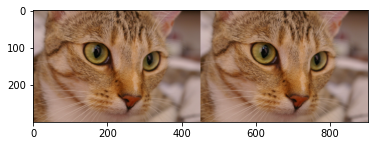

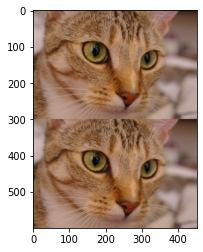

In [ ]:
cat_hstack = np.hstack((cat_rgb,cat_rgb))
cat_vstack = np.vstack((cat_rgb,cat_rgb))

plt.imshow(cat_hstack)
plt.show()
plt.imshow(cat_vstack)
plt.show()

# 좌표축 없애고 보간법 사용 ??
- interpolation='bicubic'
- interpolation='nearest'

In [ ]:
import

보간법 bicubic, 좌표축 제거 적용


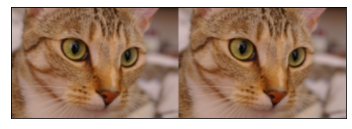

None


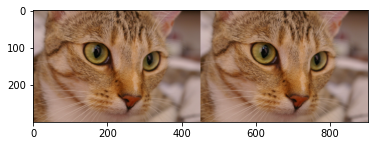

In [ ]:
print('보간법 bicubic, 좌표축 제거 적용')
plt.imshow(cat_hstack, interpolation='bicubic')
plt.xticks([]);plt.yticks([])
plt.show()
print('None')
plt.imshow(cat_hstack)
plt.show()

보간법 nearest, 좌표축 제거 적용


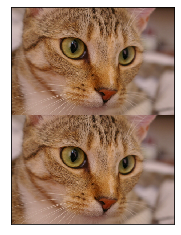

None


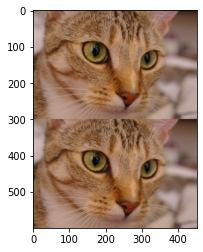

In [ ]:
print('보간법 nearest, 좌표축 제거 적용')
plt.imshow(cat_vstack, interpolation='nearest')
plt.xticks([]);plt.yticks([])
plt.show()
print('None')
plt.imshow(cat_vstack)
plt.show()

arr[A:B:C]의 의미

=> index A 부터 index B 까지 C의 간격으로 배열 생성
- A가 None 이라면, 처음부터
- B가 None 이라면, 할 수 있는 데까지 

(C가 양수라면 마지막 index까지, 

C가 음수라면 첫 index까지)
- C가 None 이라면 한 칸 간격으로 

In [ ]:
# 예제코드

arr = list(range(10))
print(arr)
# 처음부터 끝까지 두 칸 간격으로
arr[::2] 
# index 1 부터 끝까지 두 칸 간격으로 
arr[1::2] 
# 처음부터 끝까지 -1칸 간격으로 ( == 역순으로)   
arr[::-1] 
# 처음부터 끝까지 -2칸 간격으로 ( == 역순, 두 칸간격으로)
arr[::-2] 
# index 3 부터 끝까지 -1칸 간격으로 ( == 역순으로) 
arr[3::-1]
# index 1 부터 index 5 까지 두 칸 간격으로
arr[1:6:2]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


[1, 3, 5]

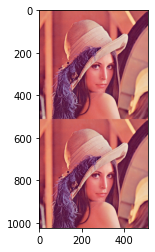

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Classroom/3-2/ImageProcessing/Images/lena.png')

vstacked_img = np.vstack((img,img)) # img:(512,512,3), stacked_img:(1024,512,3)

plt.imshow(vstacked_img[:,:,::-1]) # BGR -> RGB, color채널만 역순으로 읽음 
# plt.imshow(vstacked_img[::-1]) # 행, 열, color 채널 모두 역순으로 읽음

plt.show()

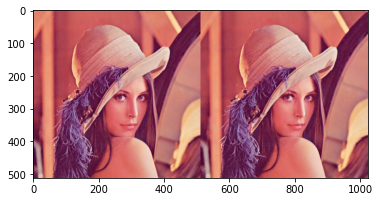

In [ ]:
hstacked_img = np.hstack((img,img))
plt.imshow(hstacked_img[:,:,::-1])
plt.show()

# np.stack 새로운 축으로 병합

- 축 지정할 수 있음, default: axis = 0
- 축 & dimension 확장 -> 차원이 그대로인 np.vstack, np.hstack과의 차이점
- if axis = 0,  행 축이 1로 추가 
- if axis = 1,  열 축이 1로 추가 

-> 복습필요

In [ ]:
a = np.ones((4,3))
b = np.zeros((4,3))
# c = np.stack((a,b)) # 기본 설정: axis=0 ->행, 위 아래로 붙음
d = np.stack((a,b), axis = 0) # 행기준으로 붙임, 위아래로 붙음
c = np.stack((a,b), axis = 1) 
print(c.shape)
print('c',c)
print(d.shape)
print('d',d)
print('a',a)
print('b',b)

(4, 2, 3)
c [[[1. 1. 1.]
  [0. 0. 0.]]

 [[1. 1. 1.]
  [0. 0. 0.]]

 [[1. 1. 1.]
  [0. 0. 0.]]

 [[1. 1. 1.]
  [0. 0. 0.]]]
(2, 4, 3)
d [[[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]
a [[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
b [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


아래 코드 이해??

In [ ]:
a = np.ones((4,3))
b = np.zeros((4,3))

c = np.stack((a,b), axis = 1)
print('c',c)
print(c[:,0,:]) # = a와 같음 (4,3) # 나머지는 다 동일, 행은 0번째만 취함
print(c[:,1,:]) # = b와 같음 (4,3) # 나머지는 다 동일, 행은 1번째만 취함

c [[[1. 1. 1.]
  [0. 0. 0.]]

 [[1. 1. 1.]
  [0. 0. 0.]]

 [[1. 1. 1.]
  [0. 0. 0.]]

 [[1. 1. 1.]
  [0. 0. 0.]]]
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


 # np.stack 이미지 lena

- 2개의 이미지가 axis 0에 

각각 index = 0, index = 1인 요소에 할당됨. 
- 이미지 출력 = stacked_image[0]임

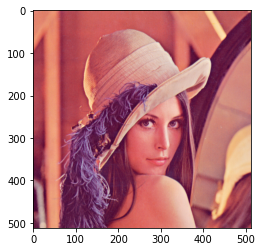

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Classroom/3-2/ImageProcessing/Lenna.png')
# img:(255,255,3)
# stacked_img(axis=0): (2,255,255,3) # np.stack이니까 새로운 축 생성됨
stacked_img = np.stack((img,img), axis=0) 
plt.imshow(stacked_img[0,:,:,::-1]) # 붙여진 두 이미지 중 0번째 
# plt.imshow(stacked_img[1,:,:,::-1]) # 붙여진 두 이미지 중 1번째 
plt.show()

 # np.stack 이미지 cat

cat_rgb.shape (300, 451, 3)
bgr_stack img shape: (300, 451, 3)


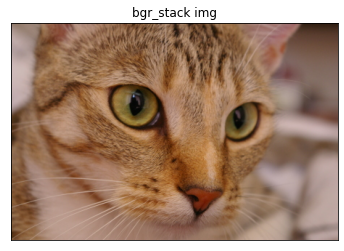

(300, 451)


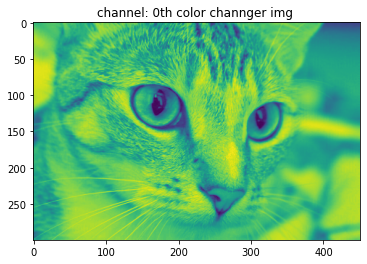

(300, 451)


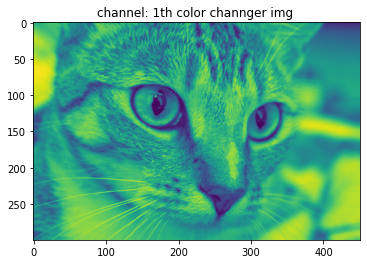

(300, 451)


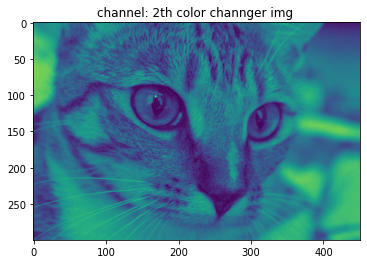

In [ ]:
cat_rgb = data.chelsea()
# 이미지 채널 축을 대상으로 각 채널별 이미지 stack
_r = cat_rgb[:,:,2] # cat_rgb의 red channer
_g = cat_rgb[:,:,1] # cat_rgb의 red channer
_b = cat_rgb[:,:,0] # cat_rgb의 red channer
list_color = [_b,_g,_r]

# b,g,r(plt default color순서)
bgr_stack = np.stack( (cat_rgb[:,:,0],cat_rgb[:,:,1],cat_rgb[:,:,2]) , axis=2 )

# r,g,b(opencv default color순서)
# rgb_stack = np.stack( (cat_rgb[:,:,1],cat_rgb[:,:,1],cat_rgb[:,:,0]) , axis=2 )

print('cat_rgb.shape', cat_rgb.shape)
print(f'bgr_stack img shape: {bgr_stack.shape}')

plt.title('bgr_stack img')
plt.imshow(bgr_stack)
plt.xticks([]),plt.yticks([])
plt.show()

for idx, c in enumerate(list_color):
  plt.title(f'channel: {idx}th color channger img ') 
  # print(f'{idx}번째 color 채널 별 이미지 출력')
  print(c.shape)
  plt.imshow(c)
  plt.show()

# stack axis = -1인 경우,

shape의 가장 마지막 인자가 2로 추가됨

In [ ]:
r = np.stack( (cat_rgb,cat_rgb), axis=0)
r2 = np.stack( (cat_rgb,cat_rgb), axis=-1)
r3 = np.stack( (cat_rgb,cat_rgb), axis=1)
print('r.shape',r.shape)
print('r2.shape',r2.shape)
print('r3.shape',r3.shape)

r.shape (2, 300, 451, 3)
r2.shape (300, 451, 3, 2)
r3.shape (300, 2, 451, 3)


# np.concatenate(a, axis=None) 축을 지정하여 붙이기

- a = ndarray
- axis = 0 -> 행이 더해짐, 더해진 값 반환 
- axis = 1 -> 열이 대상으로, 더해진 값 반환 
- axis = 2 -> 이미지에서 출력은 안됨(채널값 = shape[2]가 바뀌므로), shape[2]가 더해진 값 반환


concatenate axis = 0
(600, 451, 3)


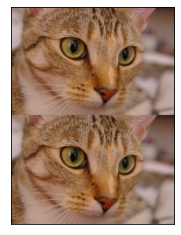

concatenate axis = 1
(300, 902, 3)


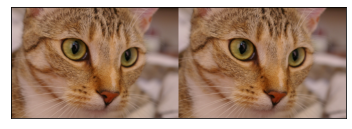

concatenate axis = 2
(300, 451, 6)


In [ ]:
print('concatenate axis = 0')
im_concat_0 = np.concatenate( (cat_rgb,cat_rgb) , axis=0 )
print(im_concat_0.shape)
plt.imshow(im_concat_0)
plt.xticks([]), plt.yticks([])
plt.show()

print('concatenate axis = 1')
im_concat_1 = np.concatenate( (cat_rgb,cat_rgb) , axis=1 )
print(im_concat_1.shape)
plt.imshow(im_concat_1)
plt.xticks([]), plt.yticks([])
plt.show()

print('concatenate axis = 2')
im_concat_2 = np.concatenate( (cat_rgb,cat_rgb) , axis=2 )
print(im_concat_2.shape)
# 출력 안됨. 4d array이므로,
# plt.imshow(im_concat_2)
# plt.xticks([]), plt.yticks([])
# plt.show()

# 중요: np.stack은 plot(image)할 수 없음
np.vstack, np.hstack, np.concatenate과 다르게
축이 하나 더(차원 확장) 생기기 때문에 plot(image)할 수 없음

# np.vsplit 수직으로 분리하기

-> 복습 필요

이미지 vsplit

(128, 512, 3)
<class 'numpy.ndarray'>


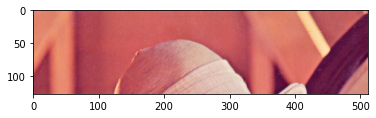

(128, 512, 3)
<class 'numpy.ndarray'>


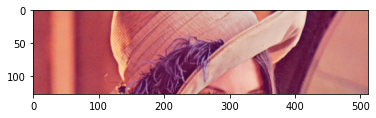

(128, 512, 3)
<class 'numpy.ndarray'>


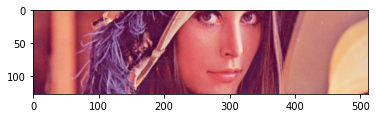

(128, 512, 3)
<class 'numpy.ndarray'>


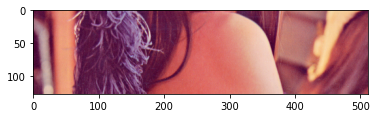

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Classroom/3-2/ImageProcessing/Images/lena.png')

# subimgs = 4개의 이미지 ndarray를 갖는 list
subimgs = np.vsplit(img, 4)  #하나의 숫자로 주어질 경우 몇 등분인지를 나타냄.

for c in subimgs: 
    print(c.shape)
    print(type(c))
    plt.imshow(c[...,::-1]) 
    # plt.imshow(c[:,:,::-1])
    plt.show()

# shape반환
- np.shape(list)
- ndarray.shape

In [ ]:
print(type(subimgs))
print(np.shape(subimgs))
# for i in range(4):
#   a = subimgs[i]
#   print(a)
subimgs[0]

<class 'list'>
(4, 128, 512, 3)


array([[[125, 137, 226],
        [125, 137, 226],
        [133, 137, 223],
        ...,
        [122, 148, 230],
        [110, 130, 221],
        [ 90,  99, 200]],

       [[125, 137, 226],
        [125, 137, 226],
        [133, 137, 223],
        ...,
        [122, 148, 230],
        [110, 130, 221],
        [ 90,  99, 200]],

       [[125, 137, 226],
        [125, 137, 226],
        [133, 137, 223],
        ...,
        [122, 148, 230],
        [110, 130, 221],
        [ 90,  99, 200]],

       ...,

       [[ 85,  68, 160],
        [ 85,  68, 160],
        [ 82,  60, 157],
        ...,
        [114, 140, 212],
        [124, 139, 213],
        [121, 135, 216]],

       [[ 80,  58, 158],
        [ 80,  58, 158],
        [ 76,  60, 164],
        ...,
        [118, 139, 212],
        [123, 137, 215],
        [115, 137, 215]],

       [[ 80,  64, 163],
        [ 80,  64, 163],
        [ 73,  55, 164],
        ...,
        [128, 139, 213],
        [121, 139, 215],
        [126, 141, 214]]

아래 경우, idx 0인 행으로 구성된 1x3인 ndarray, idx 1,2 행들이 묶인 2x3인 ndarray, 그리고 idx 3인 행으로 구성된 1x3인 ndarray로 나누어짐

np.vsplit(a, (1,3))의 반환값은 list임.

In [ ]:
import numpy as np

print(a)
a = np.arange(12).reshape(-1,3) # (4,3)
print(a)
print(type(a))

print(b)
b = np.vsplit(a, (1,3)) # (1,3)=[0:1,1:3,3:]
print(b)
print(np.shape(b))
print(type(b))

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
<class 'numpy.ndarray'>
[array([[0, 1, 2]]), array([[3, 4, 5],
       [6, 7, 8]]), array([[ 9, 10, 11]])]
[array([[0, 1, 2]]), array([[3, 4, 5],
       [6, 7, 8]]), array([[ 9, 10, 11]])]
(3,)
<class 'list'>


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [ ]:
me37408!


# np.hsplit

-> 복습 필요

In [ ]:
import numpy as np

a = np.arange(12).reshape(-1,3) # (4,3)
print(a)

b = np.hsplit(a, (2,)) # 하나짜리 튜플을 만들거면 꼭 콤마 붙이기
c = np.hsplit(a, (1,2)) # 0,1,2

print(b)
print(c)
print(type(a))
print(type(b))

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
[array([[ 0,  1],
       [ 3,  4],
       [ 6,  7],
       [ 9, 10]]), array([[ 2],
       [ 5],
       [ 8],
       [11]])]
[array([[0],
       [3],
       [6],
       [9]]), array([[ 1],
       [ 4],
       [ 7],
       [10]]), array([[ 2],
       [ 5],
       [ 8],
       [11]])]
<class 'numpy.ndarray'>
<class 'list'>


(512, 128, 3)


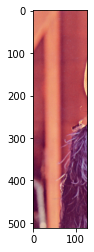

(512, 128, 3)


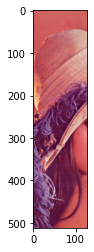

(512, 128, 3)


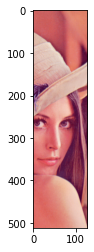

(512, 128, 3)


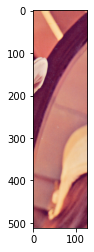

In [ ]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt 

img = cv2.imread('/content/drive/MyDrive/Classroom/3-2/ImageProcessing/Lenna.png')
subimgs = np.hsplit(img,4) 

for c in subimgs: 
    print(c.shape) 
    # plt.imshow(c[...,::-1]) 
    plt.imshow(c[:,:,::-1]) 
    plt.show()

# np.split(a, axis = None) 축을 지정하여 분리

- a = ndarray
- axis = 0 -> 행을 대상으로 shape[0]
- axis = 1 -> 열을 대상으로 shape[1]
- axis = 2 -> shape[2] (이미지이면, channer)



# (300, 451, 1)  = shape[2]가 3이 아닌 다른 숫자이면 img plot에서 invalid shape임(img plot 안됨)

- color 이미지이면 -> (300,451,3)이고
- 단일채널(r채널, g채널, b채널, gray scale)이미지이면 -> (300,451)임. 

(512, 512, 1)


TypeError: ignored

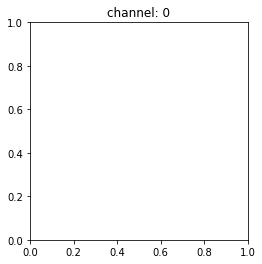

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Classroom/3-2/ImageProcessing/Images/lena.png')
# 채널별 이미지 출력
subimgs = np.split(img,3, axis=2) 

for idx, c in enumerate(subimgs): 
    print(c.shape) 
    plt.title(f'channel: {idx}') 
    plt.imshow(c[...,::-1],cmap='gray') 
    plt.show()

np.split(cat_rgb, 3, axis = -1)

즉 axis = -1이면 shape 요소 마지막에 1 추가됨 -> 차원 확장

아래 코드 복습필요 ??

In [ ]:
img_mono = np.split(cat_rgb, 3, axis = -1)
print(cat_rgb.shape)
print(np.shape(img_mono))
for idx, c in enumerate(img_mono):
  print(f'{idx}th splited image')
  print(c.shape)

(300, 451, 3)
(3, 300, 451, 1)
0th splited image
(300, 451, 1)
1th splited image
(300, 451, 1)
2th splited image
(300, 451, 1)


(300, 451, 1)


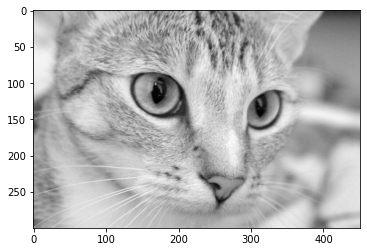

(300, 451)


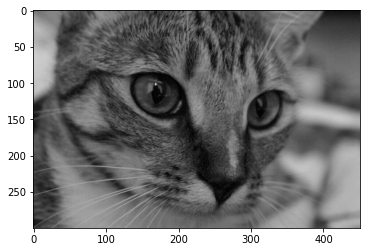

(300, 451)


In [ ]:
squeeze_0 = np.squeeze(img_mono[0]) # 차원 축소
squeeze_2 = np.squeeze(img_mono[2]) # 차원 축소
print(img_mono[0].shape)

# 이미지의 r,g,b 채널 중 b 출력(0번째)
plt.imshow(squeeze_0,cmap='gray')
plt.show()
print(squeeze_0.shape)
# 이미지의 r,g,b 채널 중 r 출력(2번째)
plt.imshow(squeeze_2,cmap='gray')
plt.show()
print(squeeze_2.shape)

과제 1. 첨부된 라벨 이미지를 uint8 의 ONE-HOT ENCODING이미지로 바꾸시오.
rgb값을 0,1로 변환 

https://colab.research.google.com/drive/1i6gVQShgu4UqdTI_yPmQCdMSwMnrfv7B

## 기타 검색용 function

- numpy.nonzero(array) : Return the indices of the elements that are non-zero.
- numpy.isnan(array) : Test element-wise for NaN and return as a "boolean array".

nan = nor a number

- numpy.isinf(array) :  Test element-wise for positive or negative infinity. Returns a boolean array of the same shape as "x", True where "x == +/-inf", otherwise "False"

⇒ **다 numpy.where로 대체 가능함**

# 팬시 인덱싱

# 조건에 맞는 값 찾기

In [ ]:
# np.max(a)
max(a)
np.min(a)
min(a)
np.sort(a)

In [ ]:
np.argmax(a)
np.argmin(a)
np.argsort(a) # 값이 작은 순서대로 그 위치를 반환